In [ ]:

# 1️ Import Libraries

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import files


# 2️ Load MNIST Data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


# 3️ Build CNN Model

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 4️ Train Model (5 epochs)

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate on MNIST test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy on MNIST: {test_acc:.4f}")




Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9134 - loss: 0.2791 - val_accuracy: 0.9847 - val_loss: 0.0445
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9861 - loss: 0.0431 - val_accuracy: 0.9886 - val_loss: 0.0351
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9901 - loss: 0.0309 - val_accuracy: 0.9903 - val_loss: 0.0318
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9941 - loss: 0.0195 - val_accuracy: 0.9884 - val_loss: 0.0335
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9961 - loss: 0.0137 - val_accuracy: 0.9914 - val_loss: 0.0275
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0352
Test Accuracy on MNIST: 0.9914


Saving two_dna.png to two_dna.png
Uploaded image: two_dna.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 2


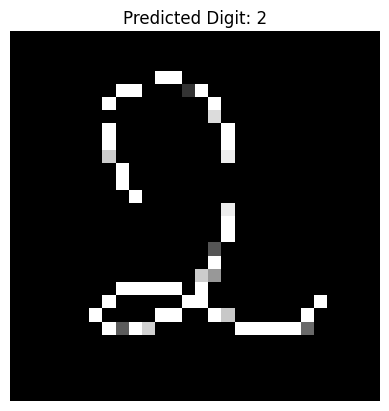

In [ ]:

# 5️ Upload Your Own Digit Image

uploaded = files.upload()  # Colab file picker
img_path = list(uploaded.keys())[0]
print("Uploaded image:", img_path)

# 6️ Preprocess Your Digit Image

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"Could not load image. Check the file: {img_path}")

# Invert colors if background is white (like typical scanned digits)
if np.mean(img) > 127:  # roughly checks if background is bright
    img = 255 - img

# Threshold to make it binary
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Resize while maintaining aspect ratio
h, w = img.shape
if h != w:
    size = max(h, w)
    new_img = np.zeros((size, size), dtype=img.dtype)
    new_img[:h, :w] = img
    img = new_img
img = cv2.resize(img, (28, 28))

# Normalize to 0-1
img = img / 255.0

# Reshape for model input
img_input = img.reshape(1, 28, 28, 1)


# 7️ Predict Digit

pred = model.predict(img_input)
predicted_digit = np.argmax(pred)
print("Predicted Digit:", predicted_digit)

# Display the image
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis("off")
plt.show()


Saving 6_dna_six.png to 6_dna_six.png
Saving 8_dna.png to 8_dna (5).png
Saving two_dna.png to two_dna (4).png
Uploaded 3 file(s): ['6_dna_six.png', '8_dna (5).png', 'two_dna (4).png']

🖼 Processing: 6_dna_six.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


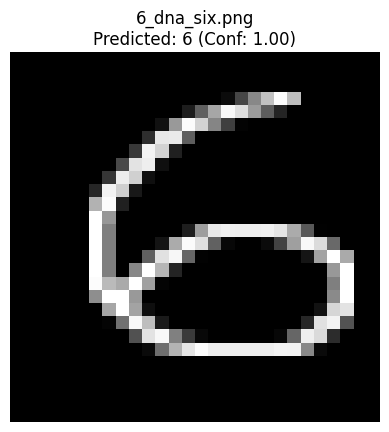

✅ 6_dna_six.png → Predicted Digit: 6  (Confidence: 1.00)

🖼 Processing: 8_dna (5).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


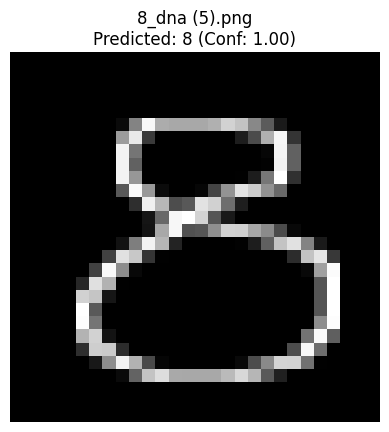

✅ 8_dna (5).png → Predicted Digit: 8  (Confidence: 1.00)

🖼 Processing: two_dna (4).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


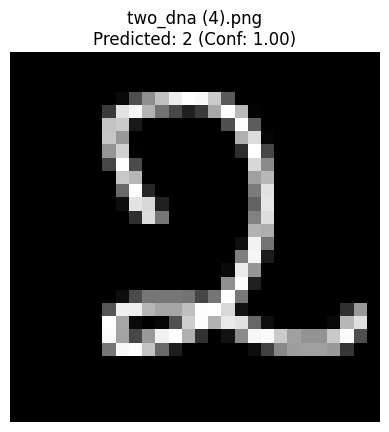

✅ two_dna (4).png → Predicted Digit: 2  (Confidence: 1.00)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from google.colab import files

# ------------------------------------------------------
# 🔹 Step 1: Upload your custom digit images
# ------------------------------------------------------
uploaded = files.upload()
print(f"Uploaded {len(uploaded)} file(s): {list(uploaded.keys())}")

# ------------------------------------------------------
# 🔹 Step 2: Process and predict each uploaded image
# ------------------------------------------------------
for img_path in uploaded.keys():
    print(f"\n🖼 Processing: {img_path}")

    # Load the image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"❌ Could not load {img_path}. Skipping...")
        continue

    # Invert if background is white
    if np.mean(img) > 127:
        img = 255 - img

    # Otsu threshold for clean binary
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 🔸 Thicken lines (helps model see thinner digits)
    kernel = np.ones((3,3), np.uint8)
    img = cv2.dilate(img, kernel, iterations=2)

    # Find contours and crop main digit
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print("⚠️ No digit found. Try clearer image.")
        continue

    cnt = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)
    digit = img[y:y+h, x:x+w]

    # Resize to 20x20
    digit = cv2.resize(digit, (20, 20), interpolation=cv2.INTER_AREA)

    # Create 28x28 padded image
    padded = np.zeros((28, 28), dtype=np.uint8)
    x_offset = (28 - 20) // 2
    y_offset = (28 - 20) // 2
    padded[y_offset:y_offset+20, x_offset:x_offset+20] = digit

    # Center of mass shift
    cy, cx = ndimage.center_of_mass(padded)
    rows, cols = padded.shape
    shiftx = np.round(cols/2.0 - cx).astype(int)
    shifty = np.round(rows/2.0 - cy).astype(int)
    M = np.float32([[1, 0, shiftx], [0, 1, shifty]])
    padded = cv2.warpAffine(padded, M, (cols, rows))

    # Normalize & reshape for prediction
    padded = padded / 255.0
    img_input = padded.reshape(1, 28, 28, 1)

    # Predict
    pred = model.predict(img_input)
    predicted_digit = np.argmax(pred)
    confidence = np.max(pred)

    # Display result
    plt.imshow(padded, cmap='gray')
    plt.title(f"{img_path}\nPredicted: {predicted_digit} (Conf: {confidence:.2f})")
    plt.axis("off")
    plt.show()

    print(f"✅ {img_path} → Predicted Digit: {predicted_digit}  (Confidence: {confidence:.2f})")
